## ML Project - Dataset 1 - Spotify

Exploration

Number of samples: 953
Number of raw features: 25
Fraction of missing values per column:
in_shazam_charts    0.052466
key                 0.099685
dtype: float64
Number of categorical variables: 7
Categorical variables: ['artist_count', 'released_month', 'released_day', 'in_deezer_charts', 'key', 'mode', 'instrumentalness_%']


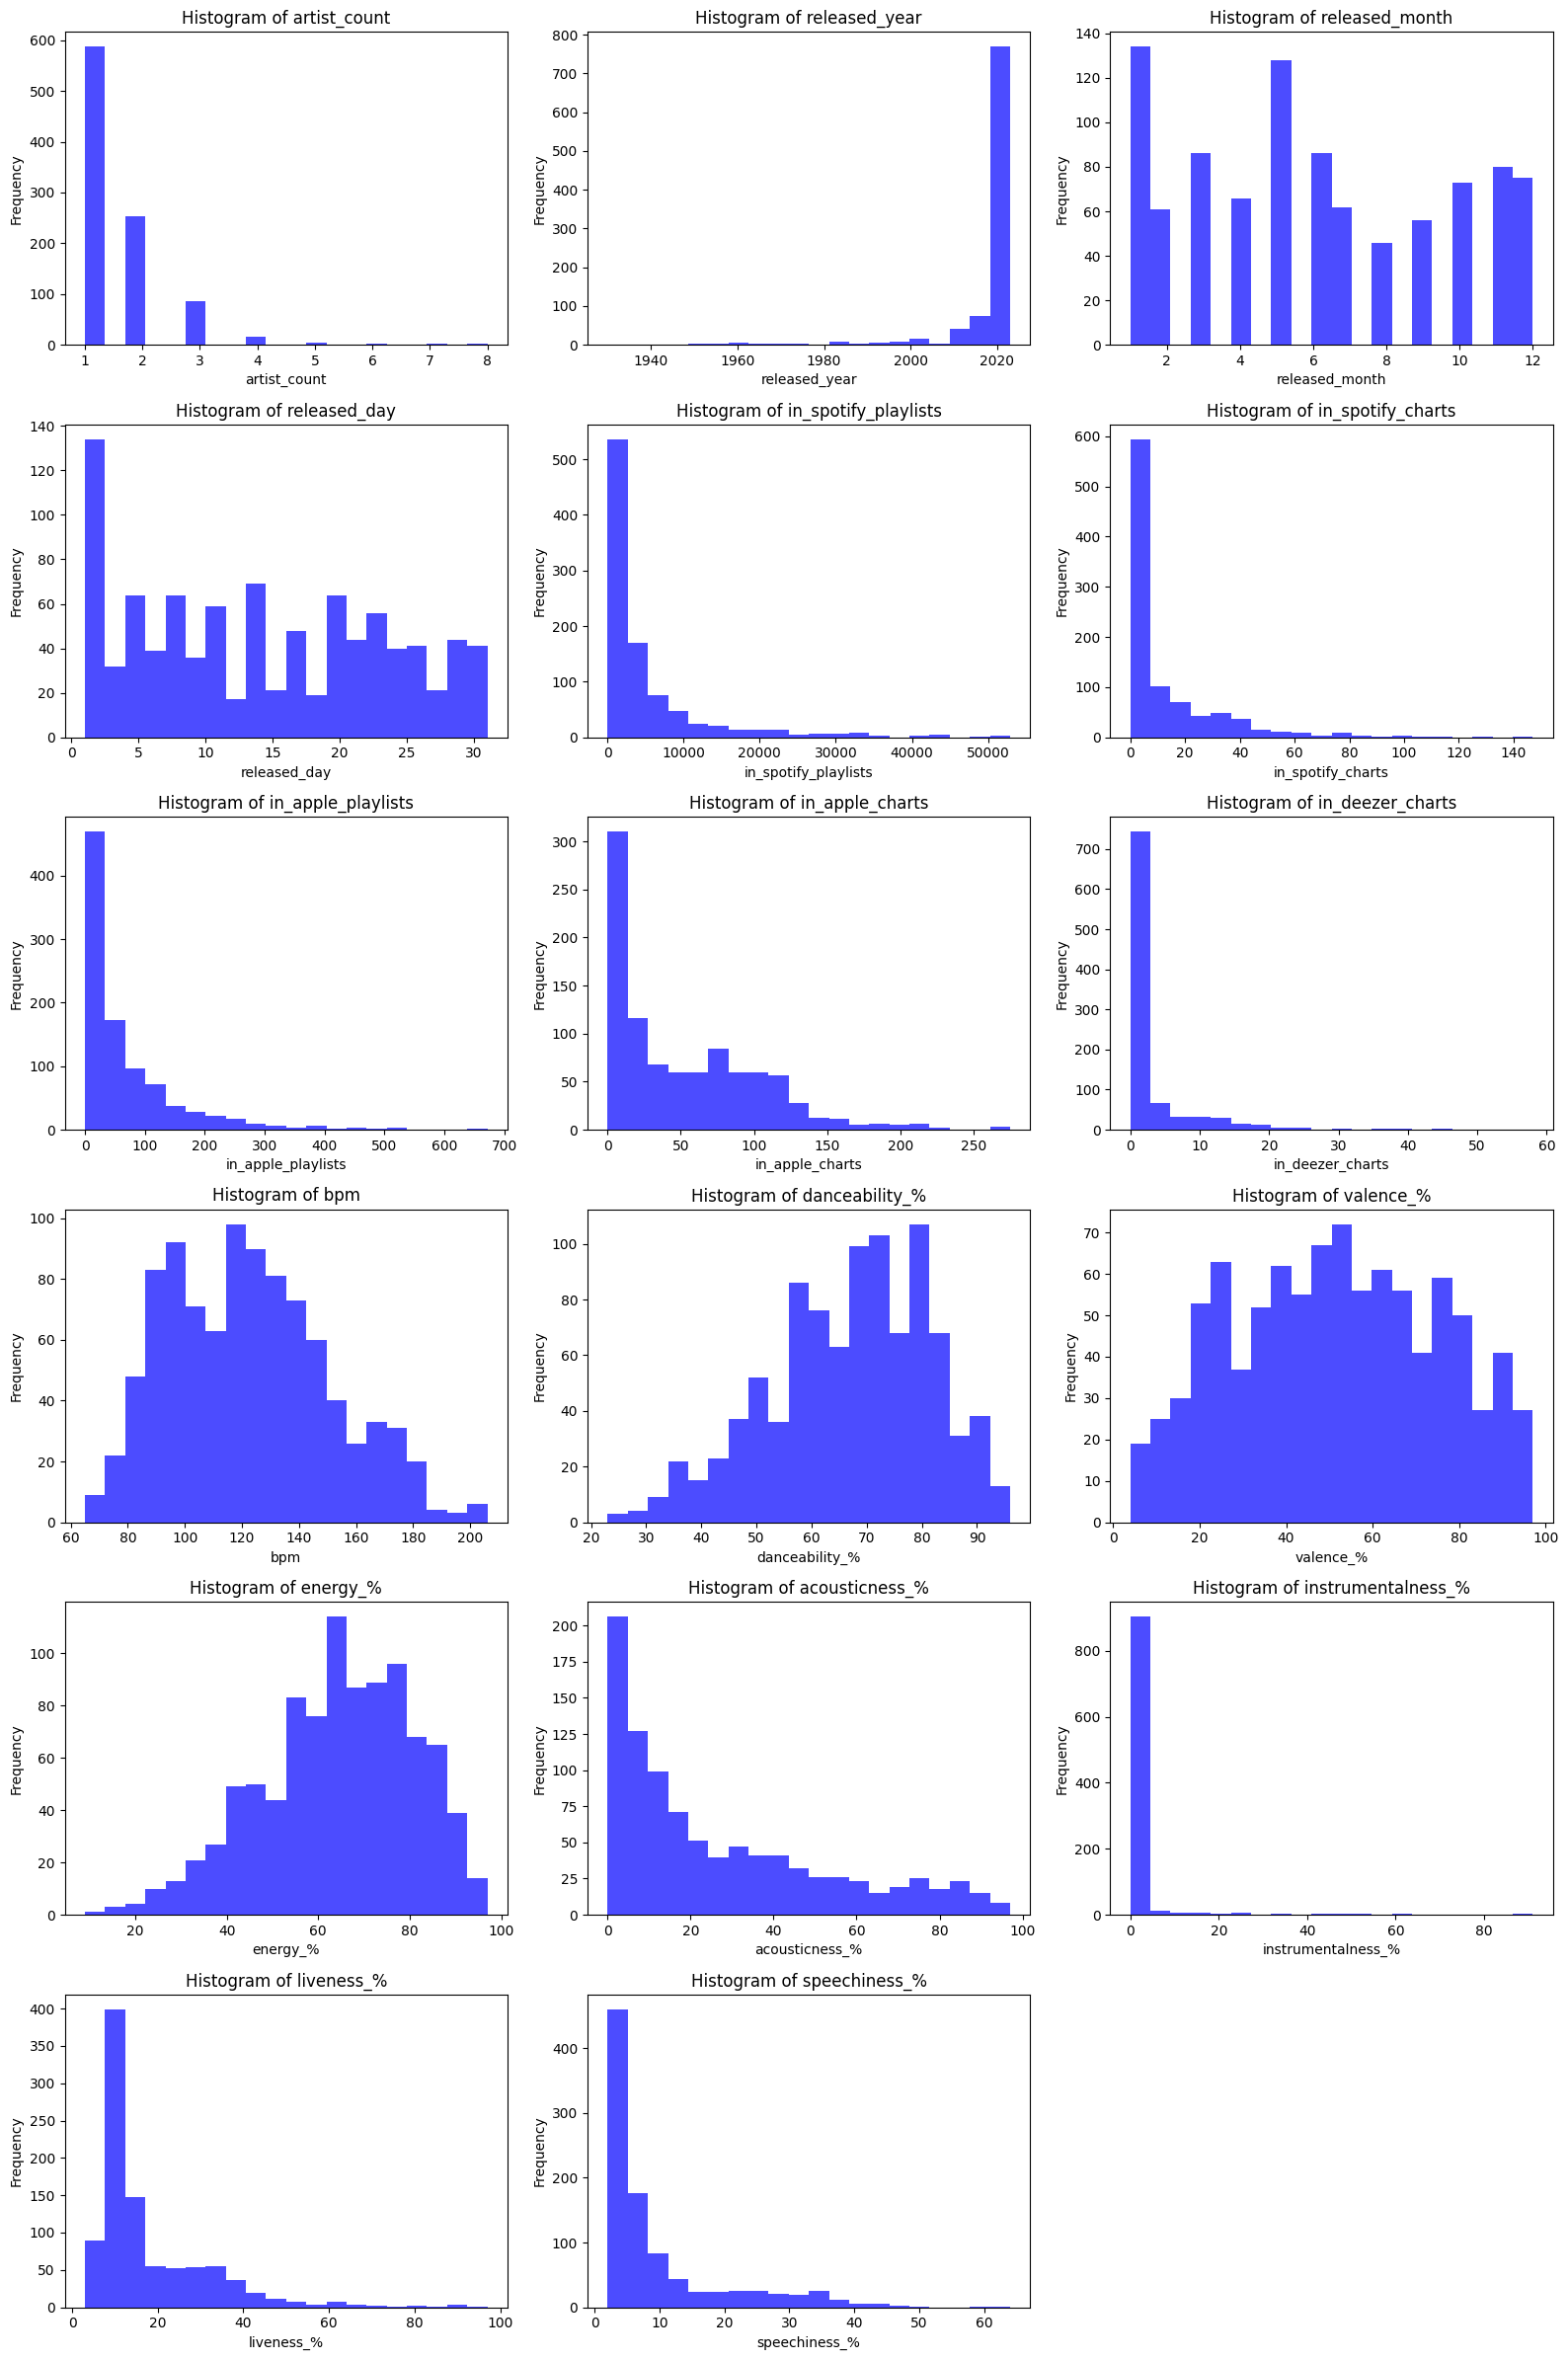

In [22]:
import numpy as np
import pandas as pd
from scipy import stats as sps
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Latex

file_path = '/Users/dakshkhetarpaul/Desktop/ML443-Final-Project/Datasets/Spotify Most Streamed Songs.csv'

# Load the data
training_data = pd.read_csv(file_path)

# Number of samples and raw features
num_samples = training_data.shape[0]
num_features = training_data.shape[1]
print(f"Number of samples: {num_samples}")
print(f"Number of raw features: {num_features}")

# Fraction of missing values
missing_values = training_data.isnull().sum() / num_samples
fraction_missing = missing_values[missing_values > 0]
if fraction_missing.empty:
    print("No missing values in the dataset.")
else:
    print("Fraction of missing values per column:")
    print(fraction_missing)

# Identify categorical columns, choosing 20

def find_categorical_columns(dataframe, unique_threshold=40):
    categorical_columns = []
    for column in dataframe.columns:
        unique_values = dataframe[column].nunique()
        if unique_values <= unique_threshold:
            categorical_columns.append(column)
    return categorical_columns


categorical_columns = find_categorical_columns(training_data)
num_categorical = len(categorical_columns)
print(f"Number of categorical variables: {num_categorical}")
print(f"Categorical variables: {categorical_columns}")

# Histograms

numeric_columns = training_data.select_dtypes(include=['number']).columns

# Define the number of histograms per row
cols_per_row = 3
num_cols = len(numeric_columns)

# Calculate the number of rows needed
num_rows = (num_cols + cols_per_row - 1) // cols_per_row  # Equivalent to math.ceil(num_cols / cols_per_row)

# Create a figure for subplots
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(16, num_rows * 4))  # Adjust size as needed
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

# Plot each histogram
for i, col in enumerate(numeric_columns):
    axes[i].hist(training_data[col], bins=20, alpha=0.7, color='blue')  # Histogram for the current column
    axes[i].set_title(f"Histogram of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")
    axes[i].grid(False)

# Hide any unused subplots
for j in range(len(numeric_columns), len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()
